<a href="https://colab.research.google.com/github/MattCodeLab/AML-Repository/blob/main/Tuned_ML_models_(Method_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AML Detection Project
Welcome to my Project where I attempt to clean, sample, modify a computer generated transaction dataset, model and evaluate a machine and deep learning model using various models, in order to achieve great accuracy and metrics.

##Methodology used
The framework for the data project is using OSEMN Framework, which involves the following steps:

1. Obtain
2. Scrub
3. Explore
4. Model
5. Interpret



###Importing relevant libraries

In [1]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 101.5 MB/s eta 0:00:00


In [3]:
import sklearn
sklearn.__version__

'1.5.2'

In [2]:
#Importing the relevant libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss, cohen_kappa_score, matthews_corrcoef, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import LSTM

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


#Obtain
For this section, the following steps are taken
1. Loading the dataset
2. Basic query on the dataset (No. of rows, datatypes, present of any null values, etc)

###Loading the Dataset

In [5]:
#Importing the dataset (High Illicit Levels + Small Transaction Volume)
##Dataset from: https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml
##Dataset generated using AMLSim, details of research paper is available here: https://arxiv.org/abs/2306.16424

raw_df = pd.read_csv('/content/drive/MyDrive/FYP AML Dataset/HI-Medium_Trans.csv')

In [6]:
print(raw_df.shape)

(31898238, 11)


In [7]:
print(raw_df['Is Laundering'].value_counts())

Is Laundering
0    31863008
1       35230
Name: count, dtype: int64


##Sampling of the Dataset
As we can see, the dataset is rather large at 31,898,238 rows. In order to improve computational efficiency, the dataset will be reduced by a factor of 40, making it 796,575 rows.

However, in this scenario, we are using Downsampling methodology, to maintain the integridy of the interrelated connections between the generated Money Laundering patterns, whereas the ones that are not classified as Money Laundering, they are downsampled.

After downsampling, the absolute number of ML counts stands at 35,230, maintaining at a overall percentage of 4.4% of the dataset.

In [8]:
# Separate majority and minority classes
df_majority = raw_df[raw_df['Is Laundering'] == 0]
df_minority = raw_df[raw_df['Is Laundering'] == 1]

# Downsample majority class
df_majority_downsampled = df_majority.sample(frac=0.02, random_state=42)

# Combine minority class with downsampled majority class
sampled_df = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(sampled_df['Is Laundering'].value_counts())

Is Laundering
0    637260
1     35230
Name: count, dtype: int64


### Basic Queries of the Dataset's Shape

In [9]:
#Snippet
print("Snippet of the dataset: ", sampled_df.head())

Snippet of the dataset:                   Timestamp  From Bank    Account  To Bank  Account.1  \
17576161  2022/09/09 06:20      29574  8053A7450    20724  80C0323A0   
14742094  2022/09/07 21:14    2142469  8341DC7F0  2153437  838C71CB0   
17297887  2022/09/09 03:15    1145753  835CA35C0  1140210  83636F140   
5608738   2022/09/02 08:41     218456  8087AF690    42983  820DD8F60   
28765699  2022/09/15 22:44       9340  80F9C4840    34340  81FB792A0   

          Amount Received Receiving Currency  Amount Paid Payment Currency  \
17576161          7376.49          US Dollar      7376.49        US Dollar   
14742094          1462.51       Mexican Peso      1462.51     Mexican Peso   
17297887          1478.01       Mexican Peso      1478.01     Mexican Peso   
5608738           2573.59               Euro      2573.59             Euro   
28765699            50.16          US Dollar        50.16        US Dollar   

         Payment Format  Is Laundering  
17576161           Cash         

In [10]:
#Info
print("Info regarding the dataset: ", sampled_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 672490 entries, 17576161 to 31896459
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           672490 non-null  object 
 1   From Bank           672490 non-null  int64  
 2   Account             672490 non-null  object 
 3   To Bank             672490 non-null  int64  
 4   Account.1           672490 non-null  object 
 5   Amount Received     672490 non-null  float64
 6   Receiving Currency  672490 non-null  object 
 7   Amount Paid         672490 non-null  float64
 8   Payment Currency    672490 non-null  object 
 9   Payment Format      672490 non-null  object 
 10  Is Laundering       672490 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 61.6+ MB
Info regarding the dataset:  None


In [11]:
#Description
print("Description of the dataset: ", sampled_df.describe())

Description of the dataset:            From Bank       To Bank  Amount Received   Amount Paid  \
count  6.724900e+05  6.724900e+05     6.724900e+05  6.724900e+05   
mean   2.875762e+05  3.988122e+05     8.139787e+06  6.818406e+06   
std    6.065648e+05  6.470307e+05     1.441645e+09  1.391870e+09   
min    0.000000e+00  0.000000e+00     1.000000e-06  1.000000e-06   
25%    2.776000e+03  2.593500e+04     2.262000e+02  2.276100e+02   
50%    3.722000e+04  1.433180e+05     1.674295e+03  1.675495e+03   
75%    2.149760e+05  2.536580e+05     1.270411e+04  1.264097e+04   
max    3.225433e+06  3.225305e+06     9.062701e+11  9.062701e+11   

       Is Laundering  
count  672490.000000  
mean        0.052387  
std         0.222807  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


In [12]:
#Null Values
print("Null values in the dataset: ", sampled_df.isnull().sum())

Null values in the dataset:  Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64


In [13]:
#Shape of dataset
print("Shape of the dataset: ", sampled_df.shape)

Shape of the dataset:  (672490, 11)


In [14]:
#Displaying the count of unique values in each column
def count_unique_values(df):
    unique_counts = {}

    for col in df.columns:
        unique_counts[col] = df[col].nunique()

    return pd.DataFrame.from_dict(unique_counts, orient='index', columns=['Unique Values'])

unique_counts_df = count_unique_values(sampled_df)
print("Count of unique values in the dataset", unique_counts_df)

Count of unique values in the dataset                     Unique Values
Timestamp                   26086
From Bank                   25616
Account                    354789
To Bank                     10412
Account.1                  455935
Amount Received            411310
Receiving Currency             15
Amount Paid                412459
Payment Currency               15
Payment Format                  7
Is Laundering                   2


In [15]:
#Displaying the Count of Money Laundering for HI-Medium dataset
ML_counts = sampled_df['Is Laundering'].value_counts()
ML_count_table = pd.DataFrame({'Value': ML_counts.index, 'Count': ML_counts.values})
ML_count_table

,Value,Count
0,0,637260
1,1,35230


#Scrub
As part of the second step in the OSEMN Framework, this section is to perform cleaning towards the dataset, prior to exploring the dataset. However, as shown in the first section, there is no null-values and the data is consistent as this is a computer generated dataset, therefore no significant cleaning is needed.

However, some data transformation is required, to form better analyses for the dataset, which is breaking down of the timestamp column into individual columns for Year, Month, Day, Hour, Minute

###Breakdown of timestamp column

In [9]:
sampled_df_chg = sampled_df.copy()

# Convert 'Timestamp' to datetime objects
sampled_df_chg['Timestamp'] = pd.to_datetime(sampled_df_chg['Timestamp'])

# Extract year, month, day, hour, and second
sampled_df_chg['Year'] = sampled_df_chg['Timestamp'].dt.year.astype(int)
sampled_df_chg['Month'] = sampled_df_chg['Timestamp'].dt.month.astype(int)
sampled_df_chg['Day'] = sampled_df_chg['Timestamp'].dt.day.astype(int)
sampled_df_chg['Hour'] = sampled_df_chg['Timestamp'].dt.hour.astype(int)
sampled_df_chg['Second'] = sampled_df_chg['Timestamp'].dt.second.astype(int)

# Drop the 'Timestamp' and 'Second' as they are redundant for our analysis
sampled_df_chg = sampled_df_chg.drop('Timestamp', axis=1)
sampled_df_chg = sampled_df_chg.drop('Second', axis=1)

In [10]:
# Checking output of the dataset
print(sampled_df_chg.head())

          From Bank    Account  To Bank  Account.1  Amount Received  \
17576161      29574  8053A7450    20724  80C0323A0          7376.49   
14742094    2142469  8341DC7F0  2153437  838C71CB0          1462.51   
17297887    1145753  835CA35C0  1140210  83636F140          1478.01   
5608738      218456  8087AF690    42983  820DD8F60          2573.59   
28765699       9340  80F9C4840    34340  81FB792A0            50.16   

         Receiving Currency  Amount Paid Payment Currency Payment Format  \
17576161          US Dollar      7376.49        US Dollar           Cash   
14742094       Mexican Peso      1462.51     Mexican Peso            ACH   
17297887       Mexican Peso      1478.01     Mexican Peso    Credit Card   
5608738                Euro      2573.59             Euro         Cheque   
28765699          US Dollar        50.16        US Dollar    Credit Card   

          Is Laundering  Year  Month  Day  Hour  
17576161              0  2022      9    9     6  
14742094        

#Explore
This section of the project details out the process of Exploratory Data Analysis, EDA, of which includes the following analysis for both the dataset as well as the filtered, only money laundering transactions.
1. Distribution of Money Laundering Data within the dataset
2. Types of payment instruments used and its distribution
3. Total count of unique accounts (Paying and Receiving)
4. Types of Payment currency used and its distribution
5. Types of Receiving currency used and its distribution
6. Total amount of Money Laundered as a proportion to Total transacted amount
7. Distribution of the Money Laundering by time (Year, Month, Day, Hour)

Creating a separate dataset that is purely ML transactions

In [18]:
sampled_df_ML = sampled_df_chg[sampled_df_chg['Is Laundering'] == 1]

###Distribution of ML Transactions

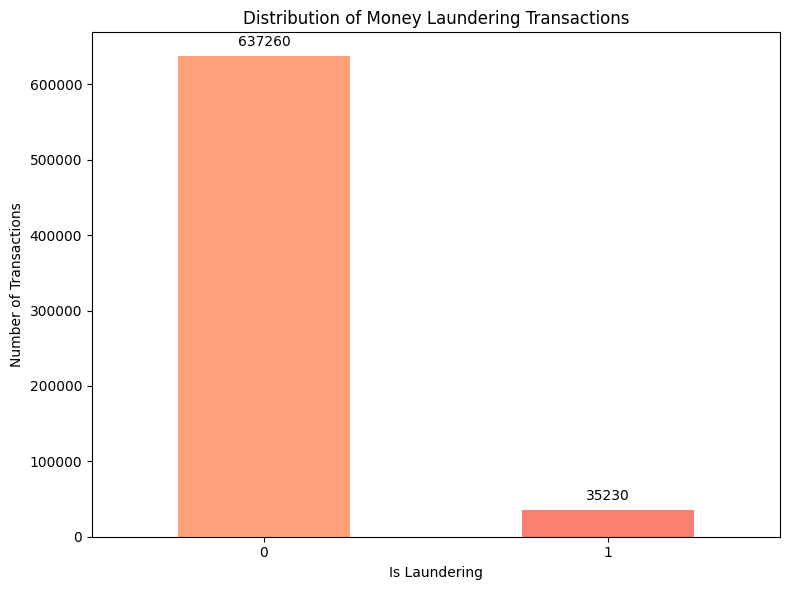

In [19]:
# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
ax = sampled_df_chg['Is Laundering'].value_counts().plot(kind='bar', color=['#FFA07A', '#FA8072', '#E9967A'])  # Warm colors

# Add data labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize the chart
plt.title('Distribution of Money Laundering Transactions')
plt.xlabel('Is Laundering')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

###Distribution of types of Payment Currency and Receiving Currencies used

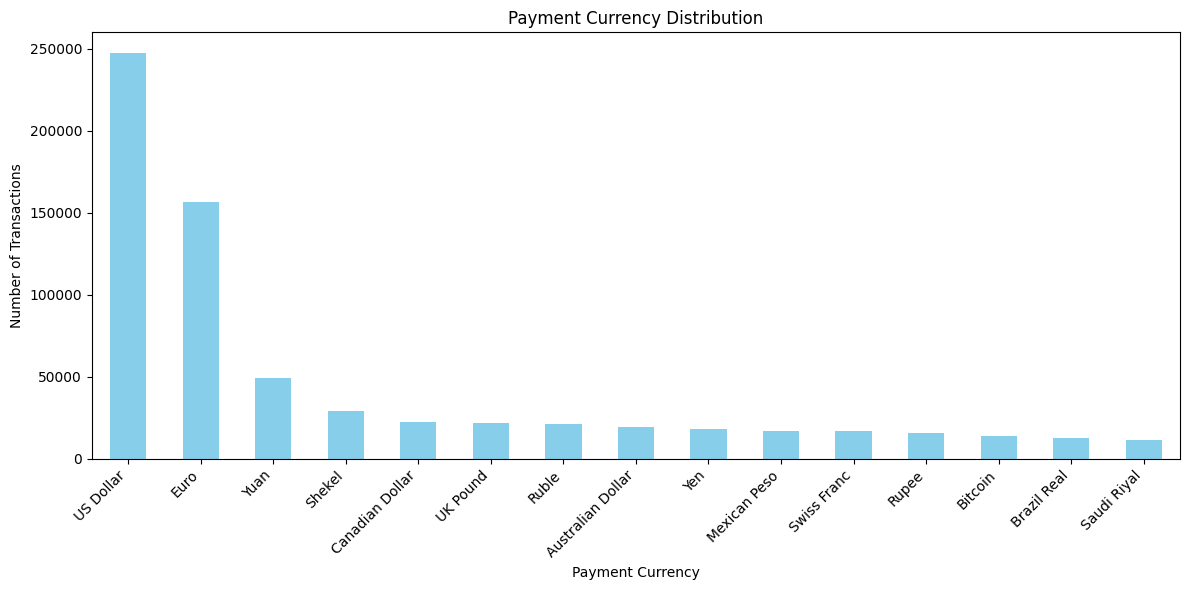

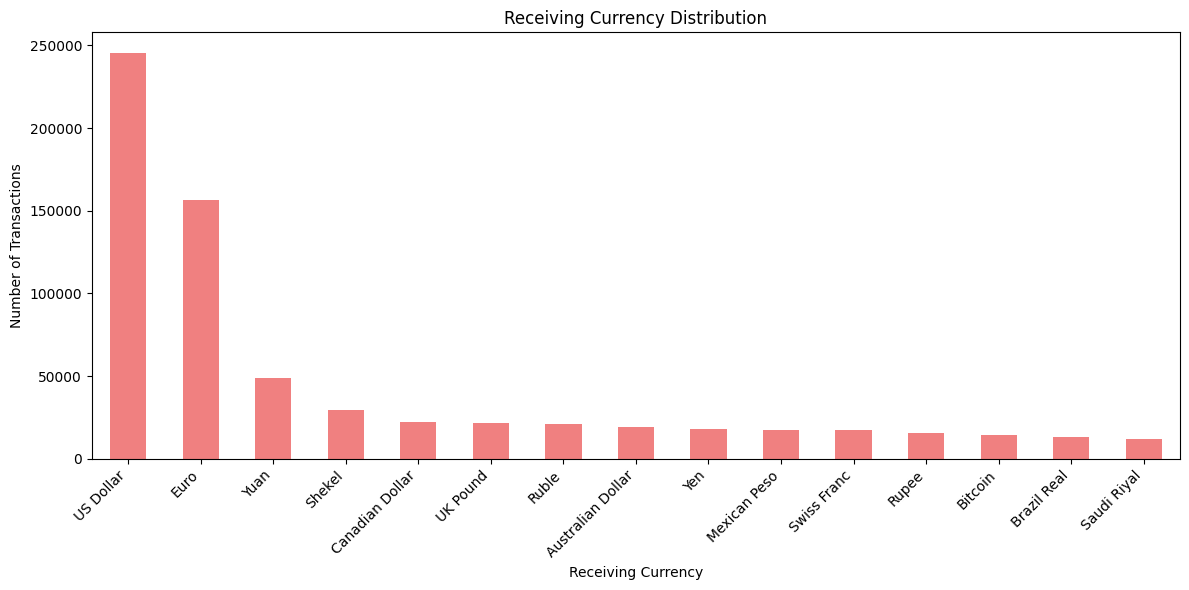

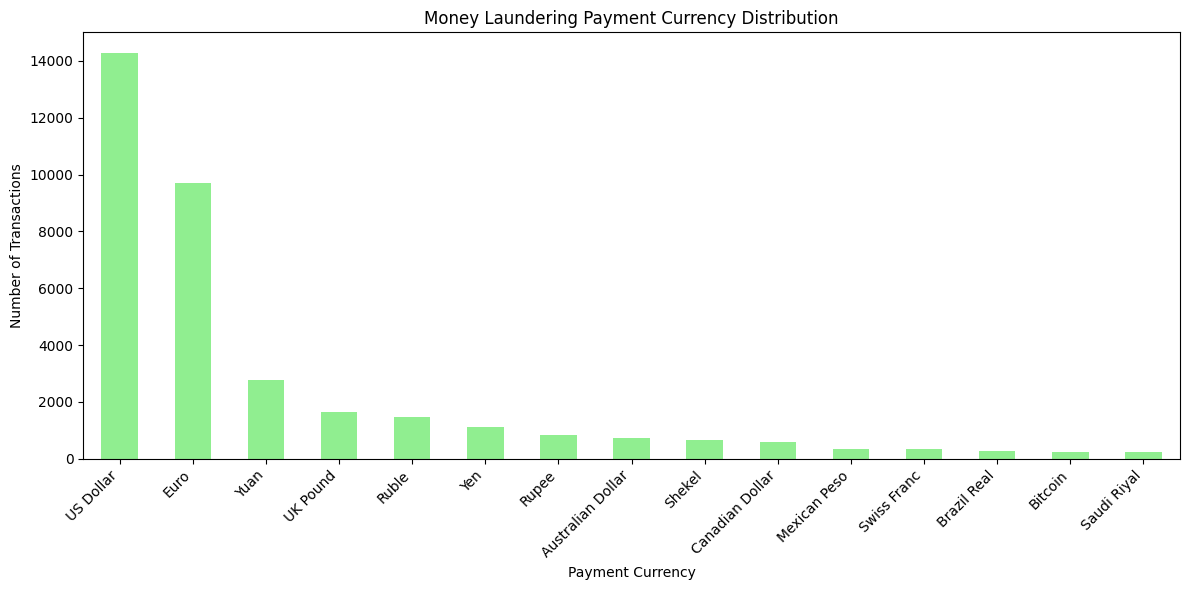

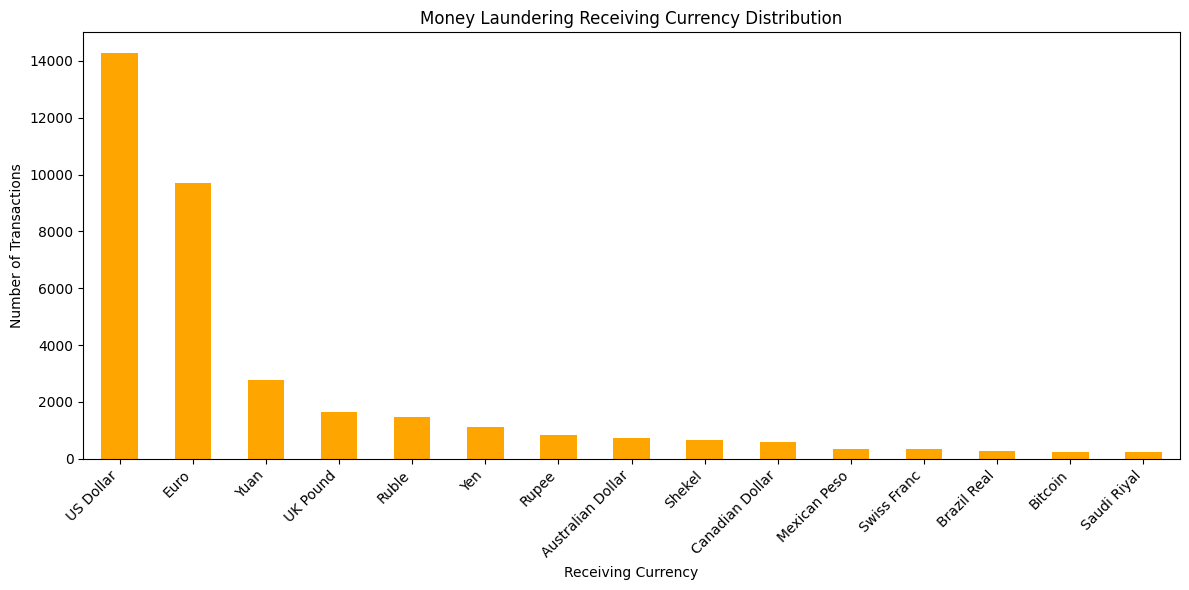

In [20]:
# Payment Currency Distribution
plt.figure(figsize=(12, 6))
payment_currency_counts = sampled_df_chg['Payment Currency'].value_counts().sort_values(ascending=False)
payment_currency_counts.plot(kind='bar', color='skyblue')
plt.title('Payment Currency Distribution')
plt.xlabel('Payment Currency')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Receiving Currency Distribution
plt.figure(figsize=(12, 6))
receiving_currency_counts = sampled_df_chg['Receiving Currency'].value_counts().sort_values(ascending=False)
receiving_currency_counts.plot(kind='bar', color='lightcoral')
plt.title('Receiving Currency Distribution')
plt.xlabel('Receiving Currency')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Payment Currency Distribution (ML Transactions)
plt.figure(figsize=(12, 6))
sampled_df_ML_payment_currency_counts = sampled_df_ML['Payment Currency'].value_counts().sort_values(ascending=False)
sampled_df_ML_payment_currency_counts.plot(kind='bar', color='lightgreen')
plt.title('Money Laundering Payment Currency Distribution')
plt.xlabel('Payment Currency')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Receiving Currency Distribution (ML Transactions)
plt.figure(figsize=(12, 6))
sampled_df_ML_receiving_currency_counts = sampled_df_ML['Receiving Currency'].value_counts().sort_values(ascending=False)
sampled_df_ML_receiving_currency_counts.plot(kind='bar', color='orange')
plt.title('Money Laundering Receiving Currency Distribution')
plt.xlabel('Receiving Currency')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Histogram for Transactions (ML and Non-ML)

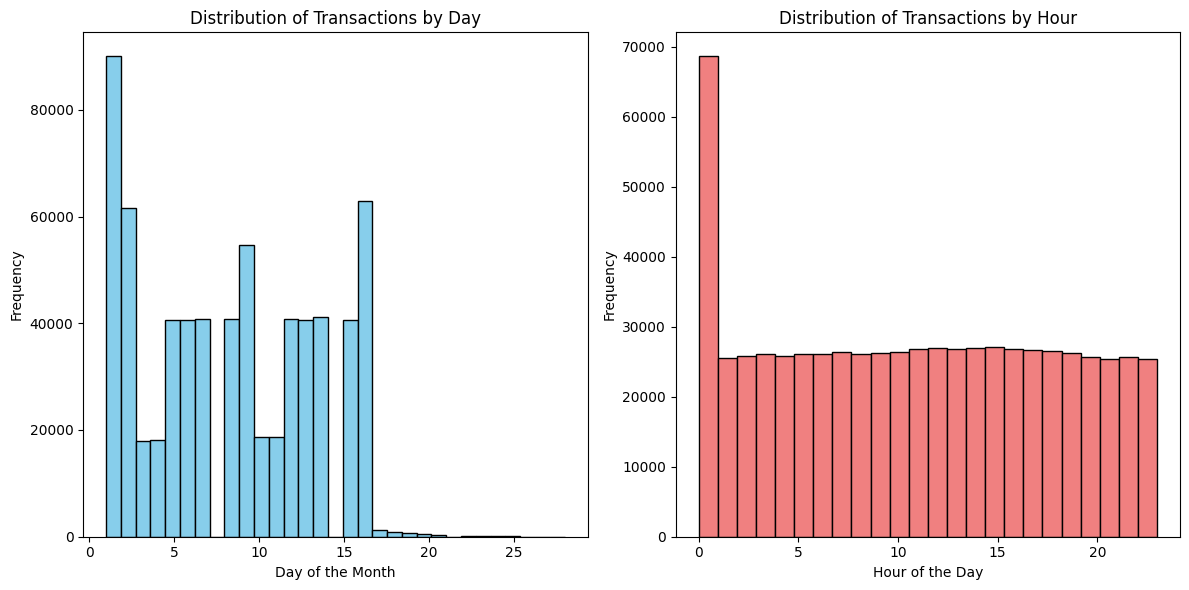

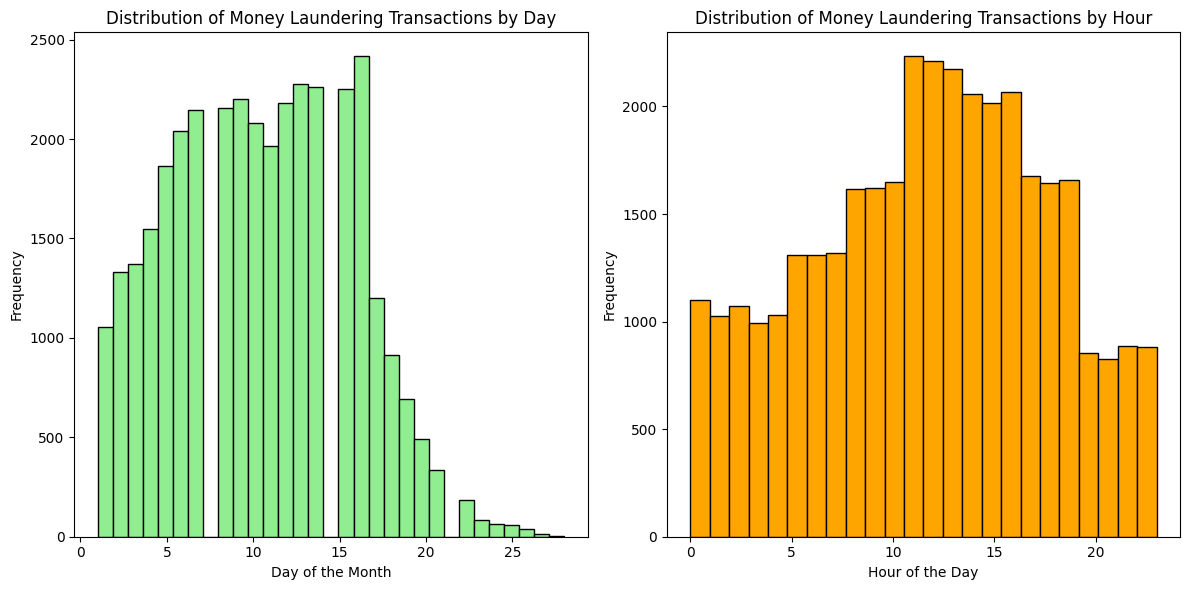

In [21]:
# Histogram for all transactions (Day and Hour)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(sampled_df_chg['Day'], bins=31, color='skyblue', edgecolor='black')  # Assuming days 1-31
plt.title('Distribution of Transactions by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(sampled_df_chg['Hour'], bins=24, color='lightcoral', edgecolor='black')  # 24 hours
plt.title('Distribution of Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Histogram for ML Transactions (Day and Hour)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(sampled_df_ML['Day'], bins=31, color='lightgreen', edgecolor='black')  # Assuming days 1-31
plt.title('Distribution of Money Laundering Transactions by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(sampled_df_ML['Hour'], bins=24, color='orange', edgecolor='black')  # 24 hours
plt.title('Distribution of Money Laundering Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

###Payment Format types distribution

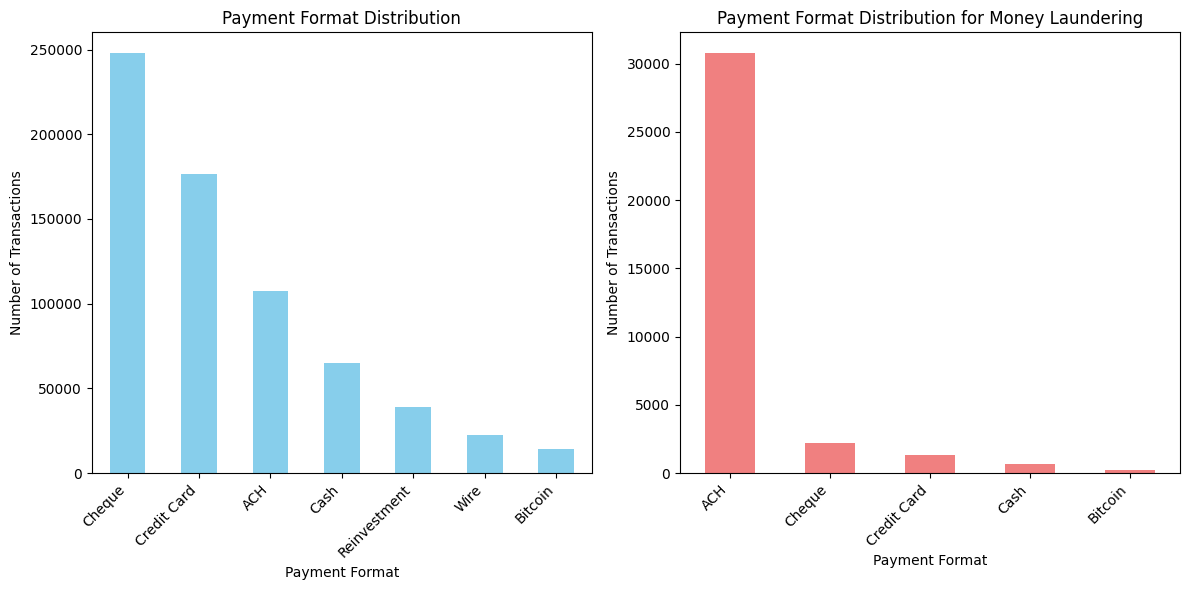

In [22]:
plt.figure(figsize=(12, 6))

# Payment Format for all transactions
plt.subplot(1, 2, 1)
sampled_df_chg['Payment Format'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Payment Format Distribution')
plt.xlabel('Payment Format')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')

# Payment Format for ML transactions
plt.subplot(1, 2, 2)
sampled_df_ML['Payment Format'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Payment Format Distribution for Money Laundering')
plt.xlabel('Payment Format')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#Model
This section of the project performs dataset modification in order to prepare for machine learning modelling.

###Data Pre-Processing: Encoding
- Label Encoding - For Columns Account & Account.1
- One-Hot Encoding - Payment & Receiving Currency, Payment Format

###Data Pre-Processing: Over-Sampling
- SMOTE (Baseline) - To Address the minority class of Money Laundering = 1 (True)

###Hyperparameter Tuning
- GridSearchCV - To find the best parameters to be used for the Machine Learning and Deep Learning Models

###Machine Learning Models
- Random Forest
- Naive Bayes Classification
- Logistic Regression
- Decision Tree

###MDeep Learning Models
- Keras Deep Learning Model
- Convolutional Neural Networks (CNNs)
- Long Short-Term Memory (LSTM) Networks
- AutoEncoders
- Graph Convolutional Networks (GCNs)

##Pre-Modelling Steps

####Re-Import packages and Libraries

In [11]:
#Importing the relevant libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss, cohen_kappa_score, matthews_corrcoef, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import LSTM
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns

###Data Pre-Processing Step

In [12]:
mldata = sampled_df_chg.copy()

###Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Account' column
mldata['Account'] = label_encoder.fit_transform(mldata['Account'])

# Fit and transform the 'Account.1' column
mldata['Account.1'] = label_encoder.fit_transform(mldata['Account.1'])


###One-Hot Encoding

In [14]:
# Perform one-hot encoding for specified columns
mldata = pd.get_dummies(mldata, columns=['Payment Currency', 'Receiving Currency', 'Payment Format'], prefix=['Payment_Currency', 'Receiving_Currency', 'Payment_Format'])

###Outcome of the Encoding Methods


In [24]:
print(mldata.head())
print(mldata.dtypes)

          From Bank  Account  To Bank  Account.1  Amount Received  \
17576161      29574    49261    20724      72187          7376.49   
14742094    2142469   270918  2153437     320426          1462.51   
17297887    1145753   277349  1140210     306767          1478.01   
5608738      218456    73278    42983     190848          2573.59   
28765699       9340   118372    34340     184526            50.16   

          Amount Paid  Is Laundering  Year  Month  Day  ...  \
17576161      7376.49              0  2022      9    9  ...   
14742094      1462.51              0  2022      9    7  ...   
17297887      1478.01              0  2022      9    9  ...   
5608738       2573.59              0  2022      9    2  ...   
28765699        50.16              0  2022      9   15  ...   

          Receiving_Currency_US Dollar  Receiving_Currency_Yen  \
17576161                          True                   False   
14742094                         False                   False   
17297887

###Train Test Split & SMOTE
This section will perform an experiment with the Train Test Split, using the train test ratio, with varying random state:
- Train: 80, Test: 20 (Random State: 42)
- Train: 90, Test: 10 (Random State: 84)

Furthermore, the two sets of train-test split will also experiment with the following oversampling methods:
- SMOTE

###SMOTE

In [15]:
#Creating the modelling dataset
X = mldata.drop('Is Laundering', axis=1)
y = mldata['Is Laundering']

#Initialising SMOTE
smote = SMOTE(random_state=99)

Set 1 smote1

In [16]:
#Creating the Train:test split for set 1
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_smote1, y_train_smote1 = smote.fit_resample(X_train1, y_train1)


Forming the datasets to be loaded later

In [17]:
X_train_smote1.to_csv('/content/drive/MyDrive/X_train_smote1.csv', index=False)
X_test1.to_csv('/content/drive/MyDrive/X_test1.csv', index=False)
y_train_smote1.to_csv('/content/drive/MyDrive/y_train_smote1.csv', index=False)
y_test1.to_csv('/content/drive/MyDrive/y_test1.csv', index=False)

Loading the previously done datasets

In [ ]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

##Machine Learning Models

####Defining the models used

In [18]:
decision_tree = DecisionTreeClassifier(random_state=42)
naive_bayes = GaussianNB()
logistic_regression = LogisticRegression(n_jobs=-1, random_state=42)
random_forest = RandomForestClassifier(n_jobs=-1, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

###Tuned Machine Learning Models

####Tuned Naive Bayes Model

Best hyperparameters for Naive Bayes: {'var_smoothing': 1.2328467394420635e-09}
Tuned Naive Bayes - Accuracy: 0.9472854614938512
Tuned Naive Bayes - Precision: 0.22413793103448276
Tuned Naive Bayes - Recall: 0.0018418815528478323
Tuned Naive Bayes - F1 Score: 0.0036537380550871273
Tuned Naive Bayes - FPR: 0.00035310734463276836
Tuned Naive Bayes - TPR: 0.0018418815528478323
Tuned Naive Bayes - FNR: 0.9981581184471522
Tuned Naive Bayes - TNR: 0.9996468926553672
Tuned Naive Bayes - Youden's J: 0.001488774208215064


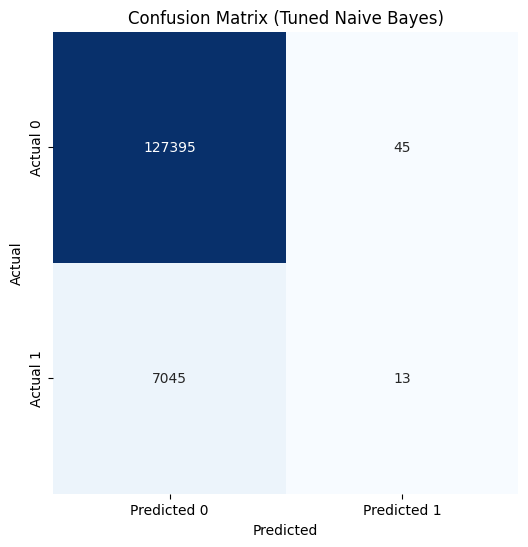

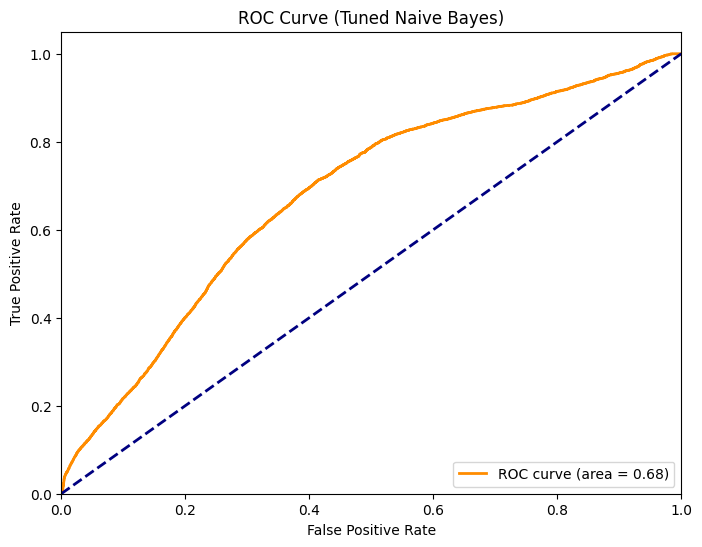

In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Initialize GridSearchCV
grid_search_nb = GridSearchCV(estimator=naive_bayes, param_grid=param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search_nb.fit(X_train_smote1, y_train_smote1)

# Get the best hyperparameters
best_params_nb = grid_search_nb.best_params_
print(f"Best hyperparameters for Naive Bayes: {best_params_nb}")

# Train the model with the best hyperparameters
best_naive_bayes = GaussianNB(**best_params_nb)
best_naive_bayes.fit(X_train_smote1, y_train_smote1)
y_pred_nb_tuned = best_naive_bayes.predict(X_test1)
y_prob_nb_tuned = best_naive_bayes.predict_proba(X_test1)[:,1]

# Evaluate the tuned model
accuracy_nb_tuned = accuracy_score(y_test1, y_pred_nb_tuned)
precision_nb_tuned = precision_score(y_test1, y_pred_nb_tuned)
recall_nb_tuned = recall_score(y_test1, y_pred_nb_tuned)
f1_nb_tuned = f1_score(y_test1, y_pred_nb_tuned)

# Confusion Matrix
conf_matrix_nb_tuned = confusion_matrix(y_test1, y_pred_nb_tuned)
TN_nb_tuned = conf_matrix_nb_tuned[0,0]
FP_nb_tuned = conf_matrix_nb_tuned[0,1]
FN_nb_tuned = conf_matrix_nb_tuned[1,0]
TP_nb_tuned = conf_matrix_nb_tuned[1,1]

# Rates
FPR_nb_tuned = FP_nb_tuned / (FP_nb_tuned + TN_nb_tuned)
TPR_nb_tuned = TP_nb_tuned / (TP_nb_tuned + FN_nb_tuned)
FNR_nb_tuned = FN_nb_tuned / (FN_nb_tuned + TP_nb_tuned)
TNR_nb_tuned = TN_nb_tuned / (TN_nb_tuned + FP_nb_tuned)

# Youden's J statistic
youden_j_nb_tuned = TPR_nb_tuned - FPR_nb_tuned

# ROC Curve
fpr_nb_tuned, tpr_nb_tuned, thresholds_nb_tuned = roc_curve(y_test1, y_prob_nb_tuned)
roc_auc_nb_tuned = auc(fpr_nb_tuned, tpr_nb_tuned)

print(f"Tuned Naive Bayes - Accuracy: {accuracy_nb_tuned}")
print(f"Tuned Naive Bayes - Precision: {precision_nb_tuned}")
print(f"Tuned Naive Bayes - Recall: {recall_nb_tuned}")
print(f"Tuned Naive Bayes - F1 Score: {f1_nb_tuned}")
print(f"Tuned Naive Bayes - FPR: {FPR_nb_tuned}")
print(f"Tuned Naive Bayes - TPR: {TPR_nb_tuned}")
print(f"Tuned Naive Bayes - FNR: {FNR_nb_tuned}")
print(f"Tuned Naive Bayes - TNR: {TNR_nb_tuned}")
print(f"Tuned Naive Bayes - Youden's J: {youden_j_nb_tuned}")

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_nb_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb_tuned, tpr_nb_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_nb_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

####Tuned Decision Tree Model

Best hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Decision Tree - Accuracy: 0.9539547056461806
Tuned Decision Tree - Precision: 0.5464205216271332
Tuned Decision Tree - Recall: 0.7213091527344857
Tuned Decision Tree - F1 Score: 0.6218015267175573
Tuned Decision Tree - FPR: 0.03316070307595732
Tuned Decision Tree - TPR: 0.7213091527344857
Tuned Decision Tree - FNR: 0.2786908472655143
Tuned Decision Tree - TNR: 0.9668392969240427
Tuned Decision Tree - Youden's J: 0.6881484496585284


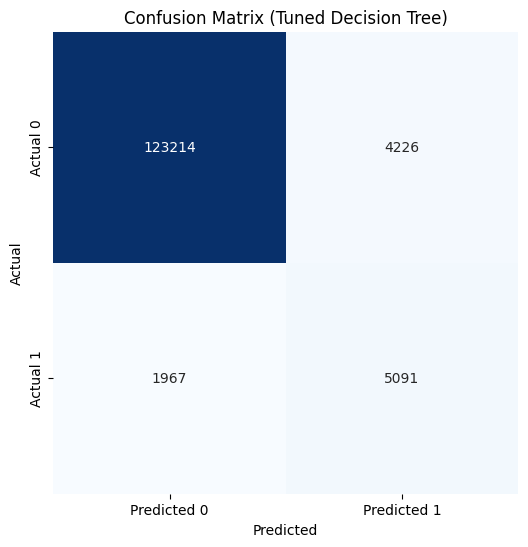

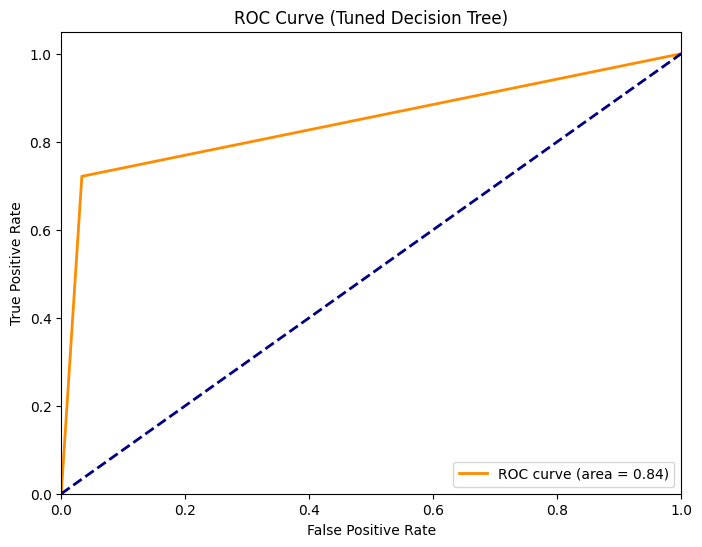

In [35]:
# Define the parameter grid for hyperparameter tuning
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search_dt.fit(X_train_smote1, y_train_smote1)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_
print(f"Best hyperparameters for Decision Tree: {best_params_dt}")

# Train the model with the best hyperparameters
best_decision_tree = DecisionTreeClassifier(**best_params_dt)
best_decision_tree.fit(X_train_smote1, y_train_smote1)
y_pred_dt_tuned = best_decision_tree.predict(X_test1)
y_prob_dt_tuned = best_decision_tree.predict_proba(X_test1)[:, 1]

# Evaluate the tuned model
accuracy_dt_tuned = accuracy_score(y_test1, y_pred_dt_tuned)
precision_dt_tuned = precision_score(y_test1, y_pred_dt_tuned)
recall_dt_tuned = recall_score(y_test1, y_pred_dt_tuned)
f1_dt_tuned = f1_score(y_test1, y_pred_dt_tuned)

# Confusion Matrix
conf_matrix_dt_tuned = confusion_matrix(y_test1, y_pred_dt_tuned)
TN_dt_tuned = conf_matrix_dt_tuned[0, 0]
FP_dt_tuned = conf_matrix_dt_tuned[0, 1]
FN_dt_tuned = conf_matrix_dt_tuned[1, 0]
TP_dt_tuned = conf_matrix_dt_tuned[1, 1]

# Rates
FPR_dt_tuned = FP_dt_tuned / (FP_dt_tuned + TN_dt_tuned) if (FP_dt_tuned + TN_dt_tuned) != 0 else 0
TPR_dt_tuned = TP_dt_tuned / (TP_dt_tuned + FN_dt_tuned) if (TP_dt_tuned + FN_dt_tuned) != 0 else 0
FNR_dt_tuned = FN_dt_tuned / (FN_dt_tuned + TP_dt_tuned) if (FN_dt_tuned + TP_dt_tuned) != 0 else 0
TNR_dt_tuned = TN_dt_tuned / (TN_dt_tuned + FP_dt_tuned) if (TN_dt_tuned + FP_dt_tuned) != 0 else 0

# Youden's J statistic
youden_j_dt_tuned = TPR_dt_tuned - FPR_dt_tuned

# ROC Curve
fpr_dt_tuned, tpr_dt_tuned, thresholds_dt_tuned = roc_curve(y_test1, y_prob_dt_tuned)
roc_auc_dt_tuned = auc(fpr_dt_tuned, tpr_dt_tuned)

print(f"Tuned Decision Tree - Accuracy: {accuracy_dt_tuned}")
print(f"Tuned Decision Tree - Precision: {precision_dt_tuned}")
print(f"Tuned Decision Tree - Recall: {recall_dt_tuned}")
print(f"Tuned Decision Tree - F1 Score: {f1_dt_tuned}")
print(f"Tuned Decision Tree - FPR: {FPR_dt_tuned}")
print(f"Tuned Decision Tree - TPR: {TPR_dt_tuned}")
print(f"Tuned Decision Tree - FNR: {FNR_dt_tuned}")
print(f"Tuned Decision Tree - TNR: {TNR_dt_tuned}")
print(f"Tuned Decision Tree - Youden's J: {youden_j_dt_tuned}")

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_dt_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_tuned, tpr_dt_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Decision Tree)')
plt.legend(loc="lower right")
plt.show()

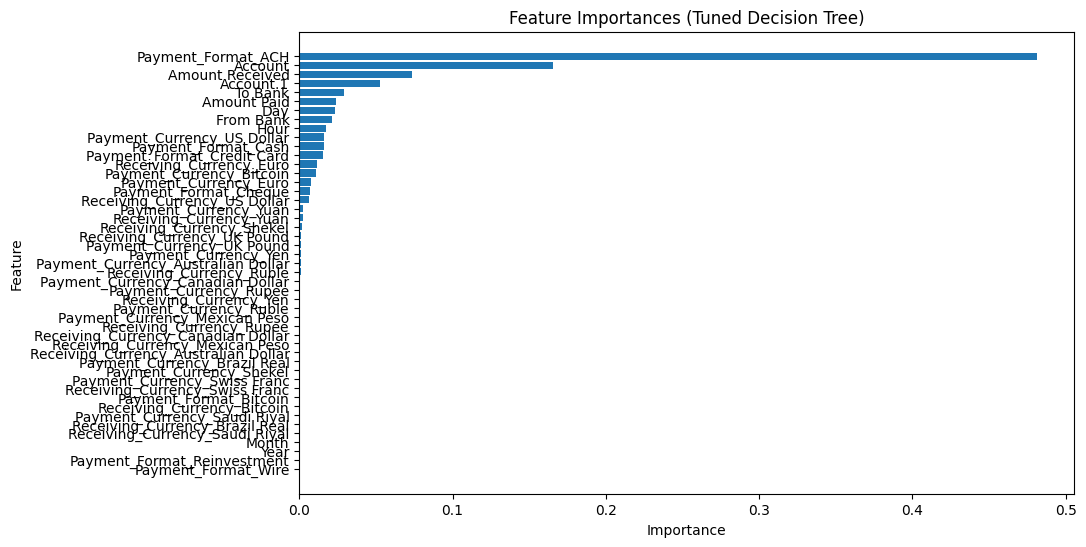

In [36]:
import matplotlib.pyplot as plt

feature_importances = best_decision_tree.feature_importances_

feature_names = X_train_smote1.columns

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Tuned Decision Tree)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

####Tuned Random Forest Model

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest - Accuracy: 0.964995762018766
Tuned Random Forest - Precision: 0.6369783166239217
Tuned Random Forest - Recall: 0.7741569849815811
Tuned Random Forest - F1 Score: 0.6988999744180097
Tuned Random Forest - FPR: 0.02443502824858757
Tuned Random Forest - TPR: 0.7741569849815811
Tuned Random Forest - FNR: 0.2258430150184188
Tuned Random Forest - TNR: 0.9755649717514124
Tuned Random Forest - Youden's J: 0.7497219567329936


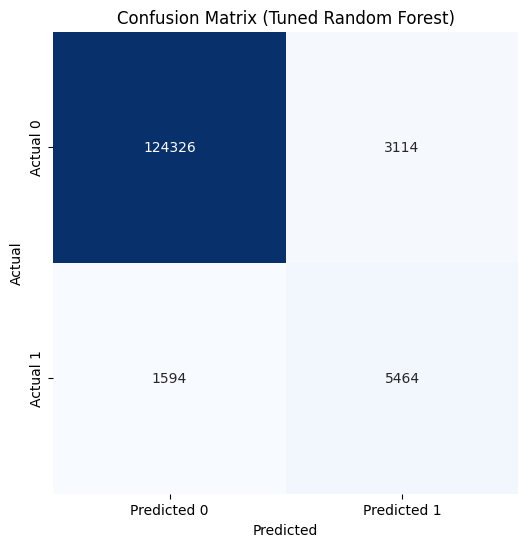

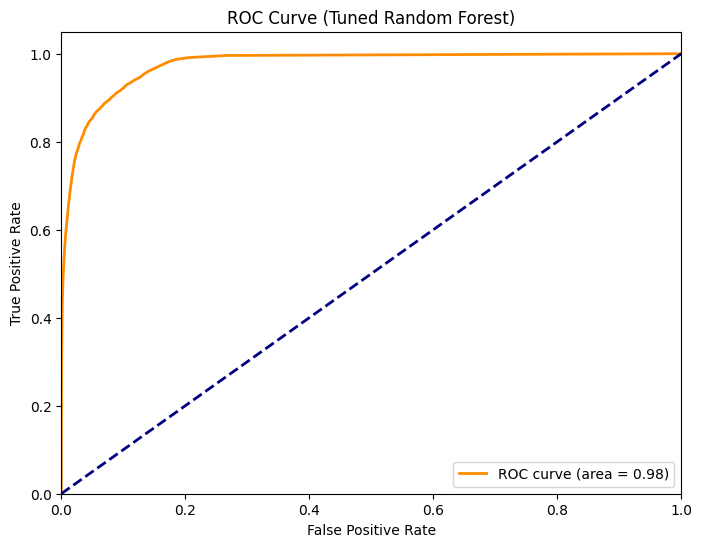

In [38]:
# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search_rf.fit(X_train_smote1, y_train_smote1)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print(f"Best hyperparameters for Random Forest: {best_params_rf}")

# Train the model with the best hyperparameters
best_random_forest = RandomForestClassifier(**best_params_rf)
best_random_forest.fit(X_train_smote1, y_train_smote1)
y_pred_rf_tuned = best_random_forest.predict(X_test1)
y_prob_rf_tuned = best_random_forest.predict_proba(X_test1)[:, 1]

# Evaluate the tuned model
accuracy_rf_tuned = accuracy_score(y_test1, y_pred_rf_tuned)
precision_rf_tuned = precision_score(y_test1, y_pred_rf_tuned)
recall_rf_tuned = recall_score(y_test1, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test1, y_pred_rf_tuned)

# Confusion Matrix
conf_matrix_rf_tuned = confusion_matrix(y_test1, y_pred_rf_tuned)
TN_rf_tuned = conf_matrix_rf_tuned[0,0]
FP_rf_tuned = conf_matrix_rf_tuned[0,1]
FN_rf_tuned = conf_matrix_rf_tuned[1,0]
TP_rf_tuned = conf_matrix_rf_tuned[1,1]

# Rates
FPR_rf_tuned = FP_rf_tuned / (FP_rf_tuned + TN_rf_tuned)
TPR_rf_tuned = TP_rf_tuned / (TP_rf_tuned + FN_rf_tuned)
FNR_rf_tuned = FN_rf_tuned / (FN_rf_tuned + TP_rf_tuned)
TNR_rf_tuned = TN_rf_tuned / (TN_rf_tuned + FP_rf_tuned)

# Youden's J statistic
youden_j_rf_tuned = TPR_rf_tuned - FPR_rf_tuned

# ROC Curve
fpr_rf_tuned, tpr_rf_tuned, thresholds_rf_tuned = roc_curve(y_test1, y_prob_rf_tuned)
roc_auc_rf_tuned = auc(fpr_rf_tuned, tpr_rf_tuned)

print(f"Tuned Random Forest - Accuracy: {accuracy_rf_tuned}")
print(f"Tuned Random Forest - Precision: {precision_rf_tuned}")
print(f"Tuned Random Forest - Recall: {recall_rf_tuned}")
print(f"Tuned Random Forest - F1 Score: {f1_rf_tuned}")
print(f"Tuned Random Forest - FPR: {FPR_rf_tuned}")
print(f"Tuned Random Forest - TPR: {TPR_rf_tuned}")
print(f"Tuned Random Forest - FNR: {FNR_rf_tuned}")
print(f"Tuned Random Forest - TNR: {TNR_rf_tuned}")
print(f"Tuned Random Forest - Youden's J: {youden_j_rf_tuned}")

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_rf_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_tuned, tpr_rf_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Random Forest)')
plt.legend(loc="lower right")
plt.show()

####Tuned Logistic Regression Model

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best hyperparameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Tuned Logistic Regression - Accuracy: 0.8886451843150084
Tuned Logistic Regression - Precision: 0.3013196848813287
Tuned Logistic Regression - Recall: 0.8508075942193256
Tuned Logistic Regression - F1 Score: 0.44502908807944563
Tuned Logistic Regression - FPR: 0.10925925925925926
Tuned Logistic Regression - TPR: 0.8508075942193256
Tuned Logistic Regression - FNR: 0.14919240578067441
Tuned Logistic Regression - TNR: 0.8907407407407407
Tuned Logistic Regression - Youden's J: 0.7415483349600663


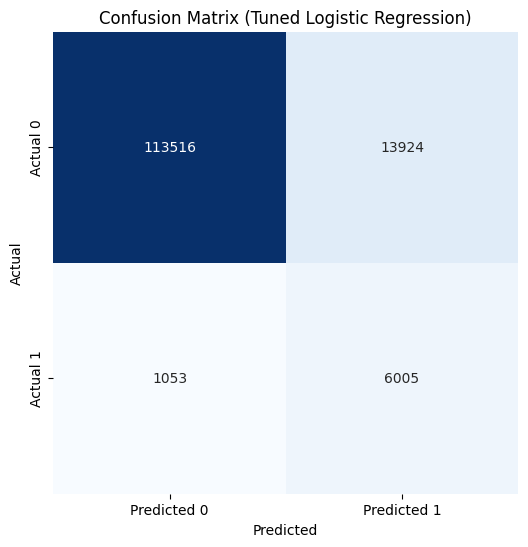

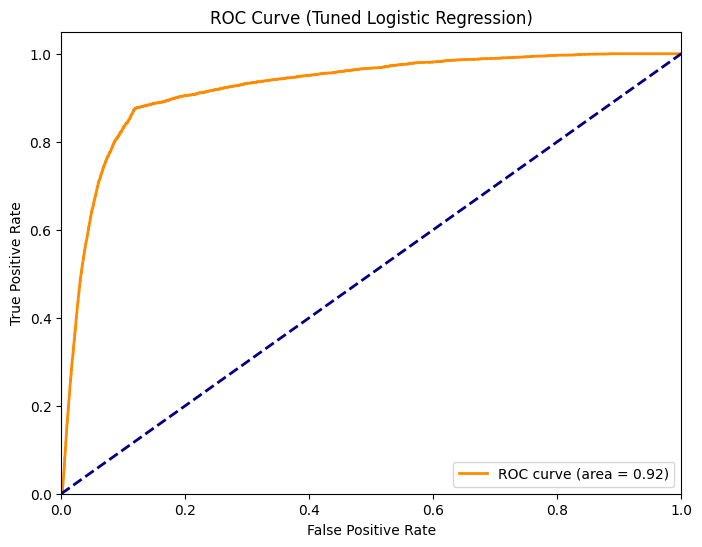

In [19]:
from sklearn.model_selection import RandomizedSearchCV

param_distribution_lr = {
    'C': [ 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] #'lbfgs', 'newton-cg', 'sag'
}

random_search_lr = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions=param_distribution_lr, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

random_search_lr.fit(X_train_smote1, y_train_smote1)

best_params_lr = random_search_lr.best_params_
print(f"Best hyperparameters for Logistic Regression: {best_params_lr}")

best_logistic_regression = LogisticRegression(**best_params_lr)
best_logistic_regression.fit(X_train_smote1, y_train_smote1)
y_pred_lr_tuned = best_logistic_regression.predict(X_test1)
y_prob_lr_tuned = best_logistic_regression.predict_proba(X_test1)[:, 1]

accuracy_lr_tuned = accuracy_score(y_test1, y_pred_lr_tuned)
precision_lr_tuned = precision_score(y_test1, y_pred_lr_tuned)
recall_lr_tuned = recall_score(y_test1, y_pred_lr_tuned)
f1_lr_tuned = f1_score(y_test1, y_pred_lr_tuned)

conf_matrix_lr_tuned = confusion_matrix(y_test1, y_pred_lr_tuned)
TN_lr_tuned = conf_matrix_lr_tuned[0,0]
FP_lr_tuned = conf_matrix_lr_tuned[0,1]
FN_lr_tuned = conf_matrix_lr_tuned[1,0]
TP_lr_tuned = conf_matrix_lr_tuned[1,1]

FPR_lr_tuned = FP_lr_tuned / (FP_lr_tuned + TN_lr_tuned)
TPR_lr_tuned = TP_lr_tuned / (TP_lr_tuned + FN_lr_tuned)
FNR_lr_tuned = FN_lr_tuned / (FN_lr_tuned + TP_lr_tuned)
TNR_lr_tuned = TN_lr_tuned / (TN_lr_tuned + FP_lr_tuned)

youden_j_lr_tuned = TPR_lr_tuned - FPR_lr_tuned

fpr_lr_tuned, tpr_lr_tuned, thresholds_lr_tuned = roc_curve(y_test1, y_prob_lr_tuned)
roc_auc_lr_tuned = auc(fpr_lr_tuned, tpr_lr_tuned)

print(f"Tuned Logistic Regression - Accuracy: {accuracy_lr_tuned}")
print(f"Tuned Logistic Regression - Precision: {precision_lr_tuned}")
print(f"Tuned Logistic Regression - Recall: {recall_lr_tuned}")
print(f"Tuned Logistic Regression - F1 Score: {f1_lr_tuned}")
print(f"Tuned Logistic Regression - FPR: {FPR_lr_tuned}")
print(f"Tuned Logistic Regression - TPR: {TPR_lr_tuned}")
print(f"Tuned Logistic Regression - FNR: {FNR_lr_tuned}")
print(f"Tuned Logistic Regression - TNR: {TNR_lr_tuned}")
print(f"Tuned Logistic Regression - Youden's J: {youden_j_lr_tuned}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_lr_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_tuned, tpr_lr_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

####Tuned Gradient Boost Model

Best hyperparameters for Gradient Boosting: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 7, 'learning_rate': 0.1}
Tuned Gradient Boosting - Accuracy: 0.9515085726181802
Tuned Gradient Boosting - Precision: 0.5239328451509198
Tuned Gradient Boosting - Recall: 0.831255313119864
Tuned Gradient Boosting - F1 Score: 0.6427475898334795
Tuned Gradient Boosting - FPR: 0.041831450094161955
Tuned Gradient Boosting - TPR: 0.831255313119864
Tuned Gradient Boosting - FNR: 0.16874468688013602
Tuned Gradient Boosting - TNR: 0.958168549905838
Tuned Gradient Boosting - Youden's J: 0.789423863025702


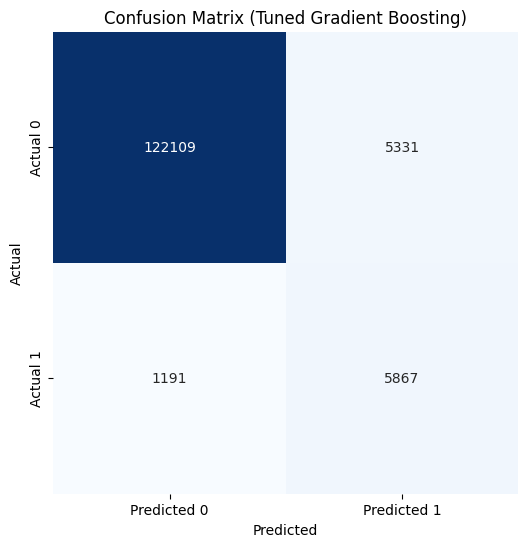

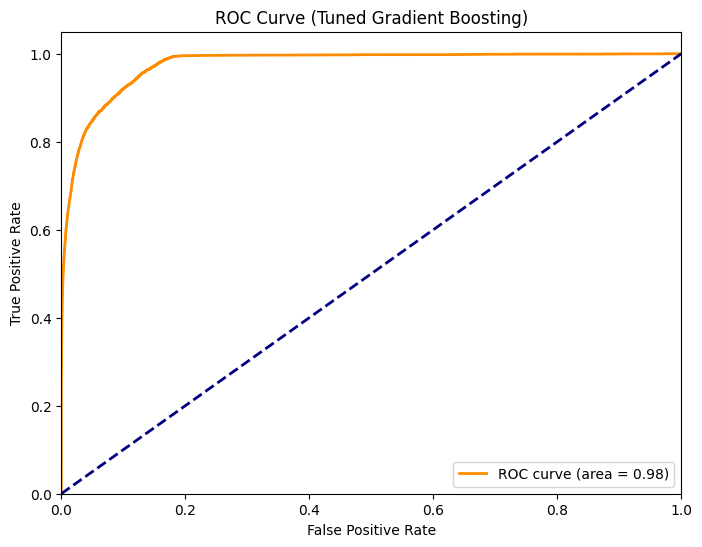

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for hyperparameter tuning
param_distribution_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search_gb = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=param_distribution_gb, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
random_search_gb.fit(X_train_smote1, y_train_smote1)

# Get the best hyperparameters
best_params_gb = random_search_gb.best_params_
print(f"Best hyperparameters for Gradient Boosting: {best_params_gb}")

# Train the model with the best hyperparameters
best_gradient_boosting = GradientBoostingClassifier(**best_params_gb)
best_gradient_boosting.fit(X_train_smote1, y_train_smote1)
y_pred_gb_tuned = best_gradient_boosting.predict(X_test1)
y_prob_gb_tuned = best_gradient_boosting.predict_proba(X_test1)[:, 1]

# Evaluate the tuned model
accuracy_gb_tuned = accuracy_score(y_test1, y_pred_gb_tuned)
precision_gb_tuned = precision_score(y_test1, y_pred_gb_tuned)
recall_gb_tuned = recall_score(y_test1, y_pred_gb_tuned)
f1_gb_tuned = f1_score(y_test1, y_pred_gb_tuned)

# Confusion Matrix
conf_matrix_gb_tuned = confusion_matrix(y_test1, y_pred_gb_tuned)
TN_gb_tuned = conf_matrix_gb_tuned[0, 0]
FP_gb_tuned = conf_matrix_gb_tuned[0, 1]
FN_gb_tuned = conf_matrix_gb_tuned[1, 0]
TP_gb_tuned = conf_matrix_gb_tuned[1, 1]

# Rates
FPR_gb_tuned = FP_gb_tuned / (FP_gb_tuned + TN_gb_tuned) if (FP_gb_tuned + TN_gb_tuned) != 0 else 0
TPR_gb_tuned = TP_gb_tuned / (TP_gb_tuned + FN_gb_tuned) if (TP_gb_tuned + FN_gb_tuned) != 0 else 0
FNR_gb_tuned = FN_gb_tuned / (FN_gb_tuned + TP_gb_tuned) if (FN_gb_tuned + TP_gb_tuned) != 0 else 0
TNR_gb_tuned = TN_gb_tuned / (TN_gb_tuned + FP_gb_tuned) if (TN_gb_tuned + FP_gb_tuned) != 0 else 0

# Youden's J statistic
youden_j_gb_tuned = TPR_gb_tuned - FPR_gb_tuned

# ROC Curve
fpr_gb_tuned, tpr_gb_tuned, thresholds_gb_tuned = roc_curve(y_test1, y_prob_gb_tuned)
roc_auc_gb_tuned = auc(fpr_gb_tuned, tpr_gb_tuned)

print(f"Tuned Gradient Boosting - Accuracy: {accuracy_gb_tuned}")
print(f"Tuned Gradient Boosting - Precision: {precision_gb_tuned}")
print(f"Tuned Gradient Boosting - Recall: {recall_gb_tuned}")
print(f"Tuned Gradient Boosting - F1 Score: {f1_gb_tuned}")
print(f"Tuned Gradient Boosting - FPR: {FPR_gb_tuned}")
print(f"Tuned Gradient Boosting - TPR: {TPR_gb_tuned}")
print(f"Tuned Gradient Boosting - FNR: {FNR_gb_tuned}")
print(f"Tuned Gradient Boosting - TNR: {TNR_gb_tuned}")
print(f"Tuned Gradient Boosting - Youden's J: {youden_j_gb_tuned}")

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_gb_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Gradient Boosting)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb_tuned, tpr_gb_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_gb_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Gradient Boosting)')
plt.legend(loc="lower right")
plt.show()

####Tuned XGBoost Model

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:08:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best hyperparameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:08:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuned XGBoost - Accuracy: 0.9604306383738048
Tuned XGBoost - Precision: 0.5962946527623696
Tuned XGBoost - Recall: 0.7615471805043922
Tuned XGBoost - F1 Score: 0.6688651070184171
Tuned XGBoost - FPR: 0.028554613935969867
Tuned XGBoost - TPR: 0.7615471805043922
Tuned XGBoost - FNR: 0.23845281949560782
Tuned XGBoost - TNR: 0.9714453860640301
Tuned XGBoost - Youden's J: 0.7329925665684223


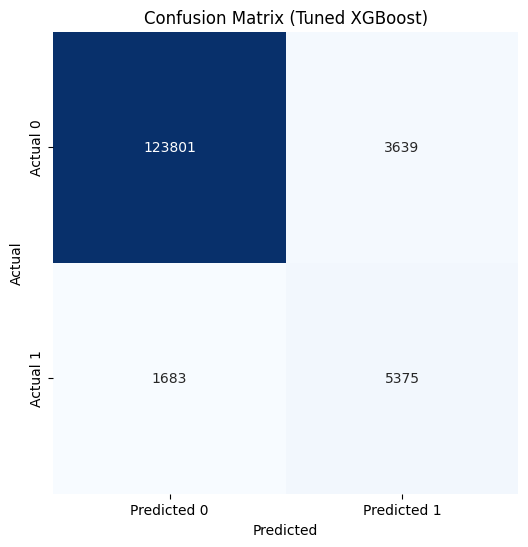

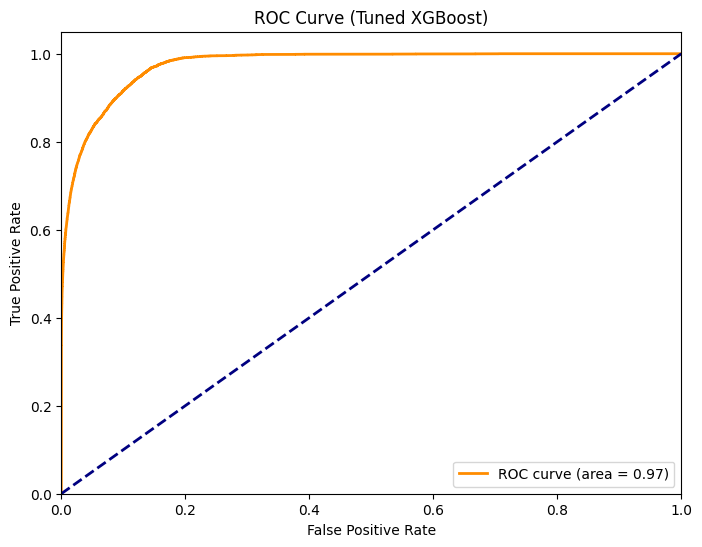

In [ ]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_xgb.fit(X_train_smote1, y_train_smote1)

best_params_xgb = grid_search_xgb.best_params_
print(f"Best hyperparameters for XGBoost: {best_params_xgb}")

best_xgboost = xgb.XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss')
best_xgboost.fit(X_train_smote1, y_train_smote1)
y_pred_xgb_tuned = best_xgboost.predict(X_test1)
y_prob_xgb_tuned = best_xgboost.predict_proba(X_test1)[:, 1]

accuracy_xgb_tuned = accuracy_score(y_test1, y_pred_xgb_tuned)
precision_xgb_tuned = precision_score(y_test1, y_pred_xgb_tuned)
recall_xgb_tuned = recall_score(y_test1, y_pred_xgb_tuned)
f1_xgb_tuned = f1_score(y_test1, y_pred_xgb_tuned)

conf_matrix_xgb_tuned = confusion_matrix(y_test1, y_pred_xgb_tuned)
TN_xgb_tuned = conf_matrix_xgb_tuned[0, 0]
FP_xgb_tuned = conf_matrix_xgb_tuned[0, 1]
FN_xgb_tuned = conf_matrix_xgb_tuned[1, 0]
TP_xgb_tuned = conf_matrix_xgb_tuned[1, 1]

FPR_xgb_tuned = FP_xgb_tuned / (FP_xgb_tuned + TN_xgb_tuned) if (FP_xgb_tuned + TN_xgb_tuned) != 0 else 0
TPR_xgb_tuned = TP_xgb_tuned / (TP_xgb_tuned + FN_xgb_tuned) if (TP_xgb_tuned + FN_xgb_tuned) != 0 else 0
FNR_xgb_tuned = FN_xgb_tuned / (FN_xgb_tuned + TP_xgb_tuned) if (FN_xgb_tuned + TP_xgb_tuned) != 0 else 0
TNR_xgb_tuned = TN_xgb_tuned / (TN_xgb_tuned + FP_xgb_tuned) if (TN_xgb_tuned + FP_xgb_tuned) != 0 else 0

youden_j_xgb_tuned = TPR_xgb_tuned - FPR_xgb_tuned

fpr_xgb_tuned, tpr_xgb_tuned, thresholds_xgb_tuned = roc_curve(y_test1, y_prob_xgb_tuned)
roc_auc_xgb_tuned = auc(fpr_xgb_tuned, tpr_xgb_tuned)

print(f"Tuned XGBoost - Accuracy: {accuracy_xgb_tuned}")
print(f"Tuned XGBoost - Precision: {precision_xgb_tuned}")
print(f"Tuned XGBoost - Recall: {recall_xgb_tuned}")
print(f"Tuned XGBoost - F1 Score: {f1_xgb_tuned}")
print(f"Tuned XGBoost - FPR: {FPR_xgb_tuned}")
print(f"Tuned XGBoost - TPR: {TPR_xgb_tuned}")
print(f"Tuned XGBoost - FNR: {FNR_xgb_tuned}")
print(f"Tuned XGBoost - TNR: {TNR_xgb_tuned}")
print(f"Tuned XGBoost - Youden's J: {youden_j_xgb_tuned}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_xgb_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned XGBoost)')
plt.legend(loc="lower right")
plt.show()

####Tuned AdaBoost Model

Best hyperparameters for AdaBoost: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 200}
Tuned AdaBoost - Accuracy: 0.9082885990869752
Tuned AdaBoost - Precision: 0.3485622453079263
Tuned AdaBoost - Recall: 0.8604420515726835
Tuned AdaBoost - F1 Score: 0.4961398635676647
Tuned AdaBoost - FPR: 0.08906151914626491
Tuned AdaBoost - TPR: 0.8604420515726835
Tuned AdaBoost - FNR: 0.13955794842731653
Tuned AdaBoost - TNR: 0.9109384808537351
Tuned AdaBoost - Youden's J: 0.7713805324264186


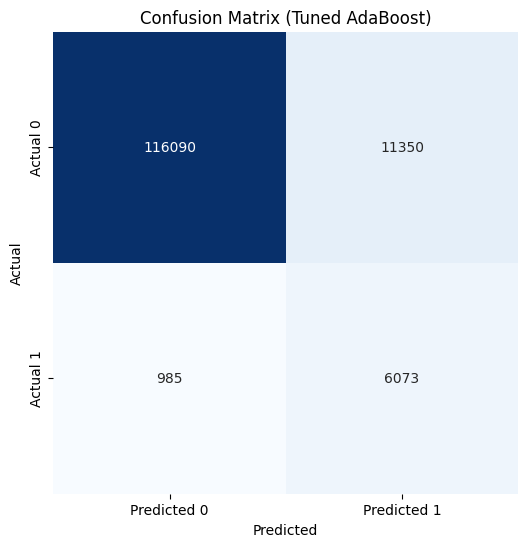

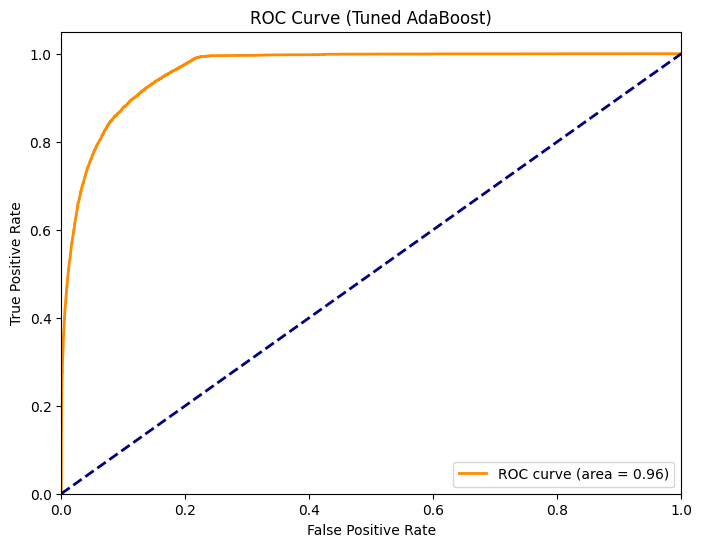

In [ ]:
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search_ada = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid_ada, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_ada.fit(X_train_smote1, y_train_smote1)

best_params_ada = grid_search_ada.best_params_
print(f"Best hyperparameters for AdaBoost: {best_params_ada}")

best_adaBoost = AdaBoostClassifier(**best_params_ada)
best_adaBoost.fit(X_train_smote1, y_train_smote1)
y_pred_ada_tuned = best_adaBoost.predict(X_test1)
y_prob_ada_tuned = best_adaBoost.predict_proba(X_test1)[:, 1]

accuracy_ada_tuned = accuracy_score(y_test1, y_pred_ada_tuned)
precision_ada_tuned = precision_score(y_test1, y_pred_ada_tuned)
recall_ada_tuned = recall_score(y_test1, y_pred_ada_tuned)
f1_ada_tuned = f1_score(y_test1, y_pred_ada_tuned)

conf_matrix_ada_tuned = confusion_matrix(y_test1, y_pred_ada_tuned)
TN_ada_tuned = conf_matrix_ada_tuned[0, 0]
FP_ada_tuned = conf_matrix_ada_tuned[0, 1]
FN_ada_tuned = conf_matrix_ada_tuned[1, 0]
TP_ada_tuned = conf_matrix_ada_tuned[1, 1]

FPR_ada_tuned = FP_ada_tuned / (FP_ada_tuned + TN_ada_tuned) if (FP_ada_tuned + TN_ada_tuned) != 0 else 0
TPR_ada_tuned = TP_ada_tuned / (TP_ada_tuned + FN_ada_tuned) if (TP_ada_tuned + FN_ada_tuned) != 0 else 0
FNR_ada_tuned = FN_ada_tuned / (FN_ada_tuned + TP_ada_tuned) if (FN_ada_tuned + TP_ada_tuned) != 0 else 0
TNR_ada_tuned = TN_ada_tuned / (TN_ada_tuned + FP_ada_tuned) if (TN_ada_tuned + FP_ada_tuned) != 0 else 0

youden_j_ada_tuned = TPR_ada_tuned - FPR_ada_tuned

fpr_ada_tuned, tpr_ada_tuned, thresholds_ada_tuned = roc_curve(y_test1, y_prob_ada_tuned)
roc_auc_ada_tuned = auc(fpr_ada_tuned, tpr_ada_tuned)

print(f"Tuned AdaBoost - Accuracy: {accuracy_ada_tuned}")
print(f"Tuned AdaBoost - Precision: {precision_ada_tuned}")
print(f"Tuned AdaBoost - Recall: {recall_ada_tuned}")
print(f"Tuned AdaBoost - F1 Score: {f1_ada_tuned}")
print(f"Tuned AdaBoost - FPR: {FPR_ada_tuned}")
print(f"Tuned AdaBoost - TPR: {TPR_ada_tuned}")
print(f"Tuned AdaBoost - FNR: {FNR_ada_tuned}")
print(f"Tuned AdaBoost - TNR: {TNR_ada_tuned}")
print(f"Tuned AdaBoost - Youden's J: {youden_j_ada_tuned}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_ada_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned AdaBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_ada_tuned, tpr_ada_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_ada_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned AdaBoost)')
plt.legend(loc="lower right")
plt.show()

###Best Parameters after tuning

####Naive Bayes

In [41]:
print(f"Best score for Naive Bayes: {grid_search_nb.best_score_}")
print(f"Best estimators for Naive Bayes: {grid_search_nb.best_estimator_}")
print(f"Best parameters for Naive Bayes: {grid_search_nb.best_params_}")

Best score for Naive Bayes: 0.5007228041269467
Best estimators for Naive Bayes: GaussianNB(var_smoothing=1.2328467394420635e-09)
Best parameters for Naive Bayes: {'var_smoothing': 1.2328467394420635e-09}


####Decision Tree

In [42]:
print(f"Best score for Decision Tree: {grid_search_dt.best_score_}")
print(f"Best estimators for Decision Tree: {grid_search_dt.best_estimator_}")
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")

Best score for Decision Tree: 0.9698148366089994
Best estimators for Decision Tree: DecisionTreeClassifier(criterion='entropy')
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


####Random Forest

In [43]:
print(f"Best score for Random Forest: {grid_search_rf.best_score_}")
print(f"Best estimators for Random Forest: {grid_search_rf.best_estimator_}")
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

Best score for Random Forest: 0.9796957749794044
Best estimators for Random Forest: RandomForestClassifier(n_jobs=-1, random_state=42)
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


####Logistic Regression

In [21]:
print(f"Best score for Logistic Regression: {random_search_lr.best_score_}")
print(f"Best estimators for Logistic Regression: {random_search_lr.best_estimator_}")
print(f"Best parameters for Logistic Regression: {random_search_lr.best_params_}")

Best score for Logistic Regression: 0.9236848299399787
Best estimators for Logistic Regression: LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


####Gradient Boost

In [ ]:
print(f"Best score for Gradient Boosting: {random_search_gb.best_score_}")
print(f"Best estimators for Gradient Boosting: {random_search_gb.best_estimator_}")
print(f"Best parameters for Gradient Boosting: {random_search_gb.best_params_}")

Best score for Gradient Boosting: 0.9622994390176925
Best estimators for Gradient Boosting: GradientBoostingClassifier(max_depth=7)
Best parameters for Gradient Boosting: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 7, 'learning_rate': 0.1}


####XGBoost

In [ ]:
print(f"Best score for XGBoost: {grid_search_xgb.best_score_}")
print(f"Best estimators for XGBoost: {grid_search_xgb.best_estimator_}")
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")

Best score for XGBoost: 0.9758316660782237
Best estimators for XGBoost: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
Best parameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


####AdaBoost

In [ ]:
print(f"Best score for AdaBoost: {grid_search_ada.best_score_}")
print(f"Best estimators for AdaBoost: {grid_search_ada.best_estimator_}")
print(f"Best parameters for AdaBoost: {grid_search_ada.best_params_}")

Best score for AdaBoost: 0.939570828920011
Best estimators for AdaBoost: AdaBoostClassifier(learning_rate=1, n_estimators=200)
Best parameters for AdaBoost: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 200}
